<a href="https://colab.research.google.com/github/navneetslovely/Wifi_RSSI_localization/blob/main/paper_simulation_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE
from sklearn import  preprocessing

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [83]:
#fetching the data from the drive
fetch_training_sample= '/content/drive/My Drive/UJIndoorLoc/UJIndoorLoc/trainingData.csv'
fetch_validation_sample= '/content/drive/My Drive/UJIndoorLoc/UJIndoorLoc/validationData.csv'

In [84]:
#reading the fetched data 
training_data = pd.read_csv(fetch_training_sample)
validation_data = pd.read_csv(fetch_validation_sample)

In [85]:
training_data.shape,validation_data.shape

((19937, 529), (1111, 529))

In [86]:
df= pd.DataFrame(data=training_data)
df1 = pd.DataFrame(data=validation_data)
df['BUILDINGID']=df.BUILDINGID.astype(str)
df1['BUILDINGID']=df.BUILDINGID.astype(str)
df['FLOOR']=df.FLOOR.astype(str)
df1['FLOOR']=df.FLOOR.astype(str)
df['newfeature'] = df[['BUILDINGID', 'FLOOR']].apply(lambda x: '.'.join(x), axis=1)
df[['newfeature']] = df[['newfeature']].apply(pd.to_numeric) 
df1['newfeature'] = df[['BUILDINGID', 'FLOOR']].apply(lambda x: '.'.join(x), axis=1)
df1[['newfeature']] = df1[['newfeature']].apply(pd.to_numeric) 
modified_training_data = pd.concat([df,df1], ignore_index=True)
modified_training_data['newfeature']=1000*modified_training_data['newfeature']
modified_training_data['newfeature'] = modified_training_data['newfeature'].astype(int) 

In [87]:
# x_training_data = training_data.drop(columns=['LONGITUDE',"LATITUDE", "FLOOR", "BUILDINGID", "SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"])
x_training_data = modified_training_data.drop(columns=['LONGITUDE',"LATITUDE", "FLOOR", "BUILDINGID", "SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP", "newfeature"])
y_training_data = modified_training_data.loc[:,['LONGITUDE',"LATITUDE", "FLOOR", "BUILDINGID", "SPACEID","newfeature"]]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x_training_data,y_training_data,test_size=0.33, random_state=42)

In [89]:
# trnd.iloc[:,:520]
X_train.shape, y_train.shape

((14102, 520), (14102, 6))

In [90]:
# row1=trnd.iloc[:len(trnd),:520]
# # row1.sort_values(by=[],axis=0,ascending=True)
# # row1
# tr=row1.T
# cht=tr
# for col in tr.columns:
#     print(col)
# print(tr[100])
# subsetDataFrame = tr[tr[100] != 100]

# # tr.sort_values(by=8,axis=0,ascending= True)

# print(subsetDataFrame)
# print(subsetDataFrame.count())
# x_em=TSNE(n_components=2).fit_transform(X_train)
# x_em.shape
# scale_MinMax=scaler.transform(X_train)

In [91]:
n_inputs = x_training_data.shape[1]
X_train=preprocessing.normalize(X_train)
X_test=preprocessing.normalize(X_test)

In [92]:
#implementing the multi_layer Perceptron (MLP)  autoencoders custom  model
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')


Epoch 1/200
142/142 - 3s - loss: 0.0206 - val_loss: 0.0018
Epoch 2/200
142/142 - 1s - loss: 0.0038 - val_loss: 0.0032
Epoch 3/200
142/142 - 1s - loss: 0.0036 - val_loss: 0.0070
Epoch 4/200
142/142 - 1s - loss: 0.0037 - val_loss: 0.0433
Epoch 5/200
142/142 - 1s - loss: 0.0038 - val_loss: 0.0309
Epoch 6/200
142/142 - 1s - loss: 0.0033 - val_loss: 0.0429
Epoch 7/200
142/142 - 1s - loss: 0.0020 - val_loss: 0.0248
Epoch 8/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0273
Epoch 9/200
142/142 - 1s - loss: 0.0021 - val_loss: 0.0142
Epoch 10/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0250
Epoch 11/200
142/142 - 1s - loss: 0.0016 - val_loss: 0.0228
Epoch 12/200
142/142 - 1s - loss: 0.0017 - val_loss: 0.0205
Epoch 13/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0408
Epoch 14/200
142/142 - 1s - loss: 0.0030 - val_loss: 0.0031
Epoch 15/200
142/142 - 1s - loss: 3.5228e-04 - val_loss: 0.0092
Epoch 16/200
142/142 - 1s - loss: 8.1192e-04 - val_loss: 7.3082e-04
Epoch 17/200
142/142 - 1s - loss: 1.9

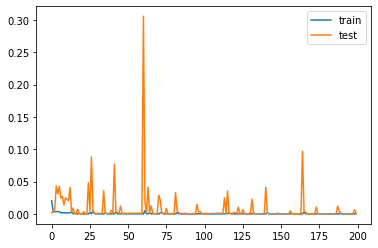

In [93]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=100, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [94]:
#with different activation function >>> relu

output_relu = Dense(n_inputs, activation='relu')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output_relu)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')


Epoch 1/200
142/142 - 3s - loss: 0.0013 - val_loss: 0.0038
Epoch 2/200
142/142 - 1s - loss: 0.0020 - val_loss: 0.0021
Epoch 3/200
142/142 - 1s - loss: 0.0022 - val_loss: 0.0019
Epoch 4/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 5/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 6/200
142/142 - 1s - loss: 0.0017 - val_loss: 0.0019
Epoch 7/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 8/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 9/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 10/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 11/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0019
Epoch 12/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 13/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 14/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0019
Epoch 15/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 16/200
142/142 - 1s - loss: 0.0018 - val_loss: 0.0018
Epoch 17/200
142/142 - 1s - loss: 0.0018 - val_lo

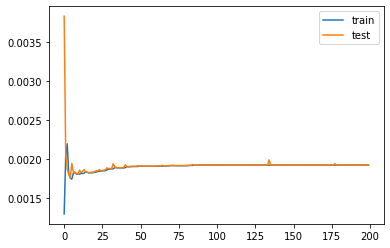

In [95]:
# plot the autoencoder
plot_model(model, 'autoencoder_no_compress_relu.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=100, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress_relu.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder_relu.h5')

Epoch 1/200
882/882 - 8s - loss: 0.0068 - val_loss: 0.0027
Epoch 2/200
882/882 - 7s - loss: 6.5333e-04 - val_loss: 9.6880e-04
Epoch 3/200
882/882 - 7s - loss: 6.4629e-04 - val_loss: 7.8158e-04
Epoch 4/200
882/882 - 7s - loss: 6.0557e-04 - val_loss: 7.4994e-04
Epoch 5/200
882/882 - 7s - loss: 5.2513e-04 - val_loss: 6.9715e-04
Epoch 6/200
882/882 - 7s - loss: 4.0853e-04 - val_loss: 5.1206e-04
Epoch 7/200
882/882 - 7s - loss: 3.1993e-04 - val_loss: 8.9494e-04
Epoch 8/200
882/882 - 7s - loss: 3.1507e-04 - val_loss: 3.4472e-04
Epoch 9/200
882/882 - 7s - loss: 2.9872e-04 - val_loss: 3.9500e-04
Epoch 10/200
882/882 - 7s - loss: 2.5301e-04 - val_loss: 3.3913e-04
Epoch 11/200
882/882 - 7s - loss: 2.5409e-04 - val_loss: 0.0017
Epoch 12/200
882/882 - 7s - loss: 2.5643e-04 - val_loss: 2.1623e-04
Epoch 13/200
882/882 - 7s - loss: 2.0500e-04 - val_loss: 1.4995e-04
Epoch 14/200
882/882 - 7s - loss: 1.7065e-04 - val_loss: 4.0484e-04
Epoch 15/200
882/882 - 7s - loss: 1.6237e-04 - val_loss: 0.0012
Epoch

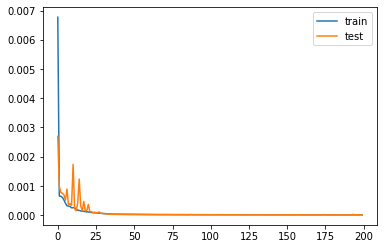

In [96]:
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder_compressed.h5')

In [97]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost
from sklearn.metrics import classification_report, confusion_matrix
# # define model
# model = LogisticRegression()
# # fit model on training set
# model.fit(X_train, y_train["FLOOR"])
# # make prediction on test set
# yhat = model.predict(X_test)

# # calculate accuracy
# acc = accuracy_score(y_test["FLOOR"], yhat)
# print("accuracy of Logistic regression ",acc)
# model = LinearRegression()
# model.fit(X_train, y_train["FLOOR"])
# yhat = model.predict(X_test)
# # calculate accuracy
# acc = accuracy_score(y_test["FLOOR"], yhat)
# print("accuracy of Logistic regression ",acc)
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train["newfeature"])
y_pred= xgb_reg.predict(X_test)

[17:34:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(confusion_matrix(Y_test['newfeature'], y_pred),"new combined feature \n")
print(classification_report(Y_test['newfeature'], y_pred),"new combined feature \n")